In [184]:
#pip install matplotlib

In [185]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


In [186]:
df = pd.read_csv('grocerydb.csv')
df_cats  = df.groupby(by='category')[['price','Protein','Total Fat','Carbohydrate','Sugars, total','Sodium','Fiber, total dietary','Cholesterol','FPro']].mean()
df_cats_size = df.groupby(by='category').size()

In [187]:
df2 = pd.DataFrame(df_cats_size)
df2.rename(columns={0:'Count'},inplace=True)
df2.reset_index()

,category,Count
0,baby-food,126
1,baking,382
2,bread,689
3,breakfast,289
4,cakes,404
5,cereal,800
6,cheese,1011
7,coffee-beans-wf,126
8,cookies-biscuit,1228
9,culinary-ingredients,194


In [188]:
df_cats.sort_values(by='Sugars, total',ascending = False, inplace = True)

In [189]:
df_cats = df_cats.merge(df2,left_on='category',right_on='category',how='inner')
df_cats.reset_index(inplace=True)
df_cats.sort_values(by='Count',ascending=False,inplace=True,ignore_index=True)
df_cats['colors'] = np.linspace(0, 1, len(df_cats['category']))

In [190]:
df_final_data = df_cats[['category','price','Sugars, total','FPro','Count','colors']]
df_final_data.sort_values('FPro', ascending=False)
df_final_data['FPro_Format'] = df['FPro'].apply(lambda x: '{:,.2f}'.format(x))

/var/folders/x3/2hzhwqqs64bg9zlfssbvx_1m0000gn/T/ipykernel_11662/3926561901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_data['FPro_Format'] = df['FPro'].apply(lambda x: '{:,.2f}'.format(x))


In [191]:
norm = colors.Normalize(vmin=df_final_data['FPro'].min(),vmax=df_final_data['FPro'].max())
scalar_mappable = cm.ScalarMappable(norm=norm, cmap='viridis')
scalar_mappable.set_array([])

/var/folders/x3/2hzhwqqs64bg9zlfssbvx_1m0000gn/T/ipykernel_11662/1936150902.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


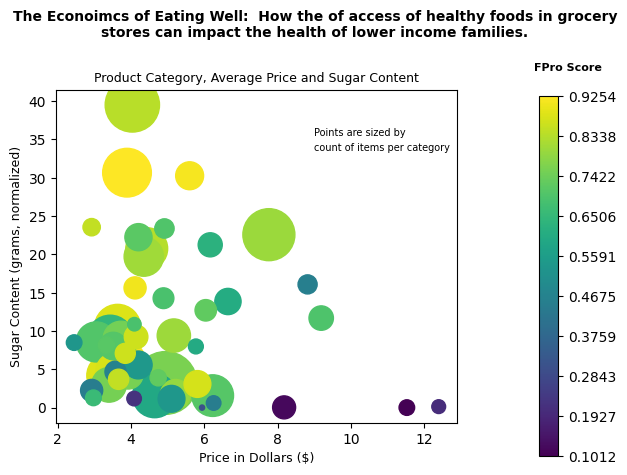

In [192]:
fig = plt.figure()
plt.suptitle(f"The Econoimcs of Eating Well:  How the of access of healthy foods in grocery stores can impact the health of lower income families.",fontsize=10,weight=1000,wrap=True)
plt.title(f"Product Category, Average Price and Sugar Content",fontsize=9,wrap=True)
plt.scatter(df_final_data['price'],df_final_data['Sugars, total'],sizes=df_final_data['Count'], c=df_final_data['FPro'])
plt.text(9,35.5,'Points are sized by ', fontsize=7,wrap=True)
plt.text(9,33.5,'count of items per category', fontsize=7,wrap=True)

plt.text(15,44,'FPro Score', weight=1000, fontsize=8)
plt.xlabel("Price in Dollars ($)",fontsize=9)
plt.ylabel("Sugar Content (grams, normalized)",fontsize=9)

cax = plt.gcf().add_axes([.85,.05, 0.03, 0.75])

plt.colorbar(scalar_mappable, ticks=np.linspace(df_final_data['FPro'].min(), df_final_data['FPro'].max(),10), cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()